In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square, periodogram
from numpy.fft import *

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (10, 14)
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


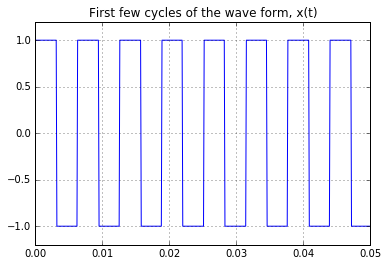

In [17]:
Fs = 10000
Ts = 1 / Fs
signal_length = 1
time = np.arange(0, signal_length, Ts)
x = square(1000 * time)
plt.plot(time, x)
plt.xlim(0, 0.05)
plt.ylim(-1.2, 1.2)
plt.title('First few cycles of the wave form, x(t)')
plt.grid()
plt.show()

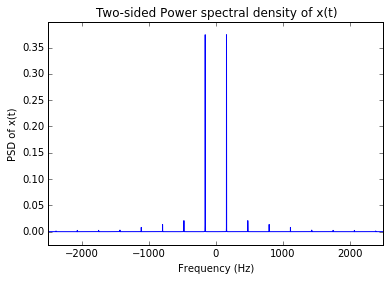

In [13]:
n = signal_length * Fs
x_power = np.sum(x ** 2) / n

XF = fft(x) / Fs
XFs = fftshift(XF)
Exf = np.abs(XFs) ** 2
Pxf = Exf / signal_length
freq = np.arange(-(n/2), n/2, 1) * Fs / n
maxPxf = np.max(Pxf)

plt.plot(freq, Pxf)
plt.xlim(-2500, 2500)
plt.ylim(-0.025, 0.025 + maxPxf)
plt.title('Two-sided Power spectral density of x(t)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD of x(t)')
plt.show()

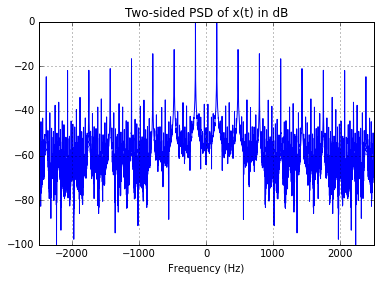

In [18]:
plt.plot(freq, 10 * np.log10(Pxf / maxPxf))
plt.xlim(-2500, 2500)
plt.ylim(-100, 0)
plt.grid()
plt.title('Two-sided PSD of x(t) in dB')
plt.xlabel('Frequency (Hz)')
plt.show()

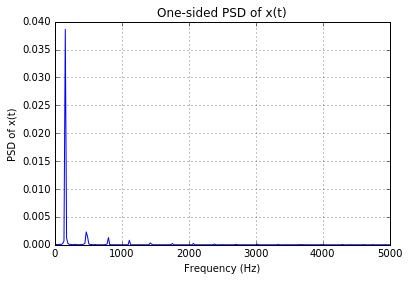

In [21]:
f, Pxf = periodogram(x, Fs, nfft=512, return_onesided=True)
plt.plot(f, Pxf)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD of x(t)')
plt.title('One-sided PSD of x(t)')
plt.grid()
plt.show()